# EXPLORATORY DATA ANALYSIS ON NYC PARKING TICKETS USING PANDAS PROJECT: CSV FILE(S)

## Author(s): Nfayem Imoro

The program performs exploratory data analysis on parking tickets in New York City, using pandas, on data acquired from a CSV file to produce a report that shows trends and insights gleaned from the following questions:
1. What are the most common types of violations?
2. Are there any missing values in the dataset?
3. How to handle missing values in the dataset?
4. How have violations changed over time (eg. monthly or yearly trends)?

### Select Data Frame and Libraries

In [1]:
# Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set the maximum number of rows to display when printing or viewing a Data Frame to 100
pd.set_option("display.max_rows", 100)

# Set the maximum number of columns to display when printing or viewing a Data Frame to 100
pd.set_option("display.max_columns", 100)

# Read Data Frame
npv = pd.read_excel("nyc-violation-ticket.xlsx")

# Display truncated Info of Data Frame
print()
npv.info(verbose = False, memory_usage="deep")
print()

# Display Data Frame
npv


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 43 entries, Summons Number to Double Parking Violation
dtypes: datetime64[ns](1), float64(5), int64(13), object(24)
memory usage: 66.7 MB



,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,Street Code2,Street Code3,Vehicle Expiration Date,Violation Location,Violation Precinct,Issuer Precinct,Issuer Code,Issuer Command,Issuer Squad,Violation Time,Time First Observed,Violation County,Violation In Front Of Or Opposite,House Number,Street Name,Intersecting Street,Date First Observed,Law Section,Sub Division,Violation Legal Code,Days Parking In Effect,From Hours In Effect,To Hours In Effect,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
0,4714702166,KGK6659,NY,PAS,2020-11-12,36,4DSD,BMW,V,0,0,0,0,NaN,0,0,0,NaN,NaN,0637P,NaN,BK,NaN,NaN,WB ATLANTIC AVE @ SH,EPHERD AVE,0,1180,B,T,NaN,NaN,NaN,GY,NaN,2007,NaN,0,NaN,PHTO SCHOOL ZN SPEED VIOLATION,NaN,NaN,NaN
1,8793684599,L5232HY,TN,PAS,2020-09-14,21,TRAC,INTER,T,60790,31140,31190,20200888,101.0,101,101,367421,T402,N,0853A,NaN,Q,O,4212,Rockaway Beach Blvd,NaN,0,408,D1,NaN,Y,0830A,1000A,WHITE,NaN,0,NaN,0,W,NaN,NaN,NaN,NaN
2,8864757053,BPMN76,FL,PAS,2020-11-25,20,SUBN,NISSA,T,36030,31190,10610,20200688,28.0,28,28,367911,T103,FF,0853A,NaN,NY,F,130,W 113th St,NaN,0,408,d,NaN,YYYYYYY,NaN,NaN,BLACK,NaN,0,NaN,0,49,20A-No Parking (Non-COM),NaN,NaN,NaN
3,8778326047,57387MJ,NY,COM,2020-08-20,38,VAN,NaN,T,34430,10410,13610,20211231,13.0,13,13,368567,T506,X,0444P,NaN,NY,F,4,W 33rd St,NaN,0,408,I3,NaN,YYYYY,0700A,0700P,WH,NaN,2016,NaN,0,1,NaN,NaN,NaN,NaN
4,4706640702,M81KFJ,NJ,PAS,2020-09-09,36,UT,TOYOT,V,0,0,0,0,NaN,0,0,0,NaN,NaN,0723A,NaN,BK,NaN,NaN,WB FOSTER AVE @ E 18,TH ST,0,1180,B,T,NaN,NaN,NaN,NaN,NaN,2002,NaN,0,NaN,PHTO SCHOOL ZN SPEED VIOLATION,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,4014245755,JPN4910,NY,PAS,2020-06-25,5,PICK,FORD,V,0,0,0,0,NaN,0,0,0,NaN,NaN,0342P,NaN,MN,NaN,NaN,EB E 125TH ST @ 2ND,AVE,0,1111,C,T,NaN,NaN,NaN,RD,NaN,2019,NaN,0,NaN,BUS LANE VIOLATION,NaN,NaN,NaN
49996,8794437506,174ZYG,CT,PAS,2020-08-25,31,4DSD,TOYOT,T,34030,10410,10510,88880088,6.0,6,6,363026,T101,B,0828A,NaN,NY,F,13,W 13th St,NaN,0,408,I3,NaN,YYYYY,0800A,0700P,BLACK,NaN,0,NaN,0,16,NaN,NaN,NaN,NaN
49997,8849769581,HES6895,NY,PAS,2020-11-03,46,SUBN,CADIL,T,27120,59520,49120,20220413,48.0,48,48,367900,T801,B,0933P,NaN,BX,F,797,E 182nd St,NaN,0,408,E2,NaN,YYYYYYY,NaN,NaN,RD,NaN,2005,NaN,0,K,NaN,NaN,NaN,NaN
49998,8755448173,63035MN,NY,COM,2020-08-19,40,DELV,ISUZU,T,0,0,0,20211130,52.0,52,52,364833,T201,G,1215P,NaN,BX,I,E,W Kingsbridge Rd,60ft N/of Davidson A,0,408,D1,NaN,YYYYYYY,NaN,NaN,WH,NaN,2020,NaN,5,67,NaN,NaN,NaN,NaN


### 1. What are the most common types of violations?

In [2]:
# Determine the frequency of each common type of violation
common_violations = npv["Violation Description"].value_counts()

# Determine the top 10 common types of violations
top10_violations = common_violations.head(10)

# Display Results
print()
print("The common types of violations are:")
print()
print(common_violations)
print()
print("The top 10 common types of violations are:")
print()
print(top10_violations)


The common types of violations are:

Violation Description
PHTO SCHOOL ZN SPEED VIOLATION    14422
FAILURE TO STOP AT RED LIGHT       1692
BUS LANE VIOLATION                 1435
21-No Parking (street clean)        814
38-Failure to Dsplay Meter Rec      707
14-No Standing                      521
40-Fire Hydrant                     452
20A-No Parking (Non-COM)            320
MOBILE BUS LANE VIOLATION           308
37-Expired Parking Meter            209
19-No Stand (bus stop)              175
46B-Double Parking (Com-100Ft)      155
46A-Double Parking (Non-COM)        153
31-No Stand (Com. Mtr. Zone)        147
16A-No Std (Com Veh) Non-COM        134
20-No Parking (Com Plate)           121
74A-Improperly Displayed Plate      102
69-Fail to Dsp Prking Mtr Rcpt      102
17-No Stand (exc auth veh)           84
74-Missing Display Plate             67
50-Crosswalk                         65
47-Double PKG-Midtown(Com Veh)       63
84-Platform lifts in low posit       49
48-Bike Lane        

### 2. Are there any missing values in the dataset?

In [3]:
# Determine the proportion of missing values in each column
missing_percentage = ((npv.isnull().mean() * 100).round(2)).sort_values(ascending=False)

# Print the proportion of missing values in each column before pruning
print()
print("The proportion of missing values in each column before pruning is:")
print()
print(missing_percentage)


The proportion of missing values in each column before pruning is:

Double Parking Violation             100.00
No Standing or Stopping Violation    100.00
Hydrant Violation                    100.00
Time First Observed                   96.22
Unregistered Vehicle?                 95.78
Meter Number                          95.70
Violation Legal Code                  64.29
From Hours In Effect                  60.79
To Hours In Effect                    60.79
Intersecting Street                   54.57
Violation Description                 54.40
Violation Post Code                   39.93
House Number                          36.54
Violation In Front Of Or Opposite     36.14
Violation Location                    35.79
Days Parking In Effect                35.71
Issuer Command                        35.71
Issuer Squad                          35.71
Vehicle Color                          4.83
Vehicle Body Type                      0.29
Vehicle Make                           0.27
Violati

### 3. How to handle missing values in the dataset?

#### Step 1: Identify columns with a proportion of missing values greater than the proportion of missing values in the column(s) of interest

In [4]:
# Determine the proportion of missing values in the column(s) of interest
missing_percentage_coi = (npv["Violation Description"].isnull().mean() * 100).round(2)

# Determine the proportion of missing values in columns greater than the proportion of missing values in the column(s) of interest
columns_tobe_dropped = missing_percentage[missing_percentage > missing_percentage_coi].sort_values()

# Display Results
print()
print(f"Violation Description has {missing_percentage_coi:.2f}% of its entries as missing values")
print()
print(f"Columns with a proportion of missing values greater than {missing_percentage_coi:.2f}% are:")
print()
print(columns_tobe_dropped)


Violation Description has 54.40% of its entries as missing values

Columns with a proportion of missing values greater than 54.40% are:

Intersecting Street                   54.57
From Hours In Effect                  60.79
To Hours In Effect                    60.79
Violation Legal Code                  64.29
Meter Number                          95.70
Unregistered Vehicle?                 95.78
Time First Observed                   96.22
Double Parking Violation             100.00
No Standing or Stopping Violation    100.00
Hydrant Violation                    100.00
dtype: float64


#### Step 2: Drop columns with a proportion of missing values greater than the proportion of missing values in the column(s) of interest

In [28]:
# Drop columns with a proportion of missing values greater than the proportion of missing values in the "Violation Description" column
npv_igp = npv.dropna(axis=1, thresh = (1-missing_percentage_coi/100)*50000)

# Determine the proportion of missing values in the pruned Data Frame
missing_percentage_igp = ((npv_igp.isnull().mean() * 100).round(2)).sort_values(ascending=False)

# Print the proportion of missing values in each column of the pruned Data Frame
print()
print("The proportion of missing values in each column of the pruned Data Frame is:")
print()
print(missing_percentage_igp)
print()

#Display pruned Data Frame
npv_igp


The proportion of missing values in each column of the pruned Data Frame is:

Violation Description                54.40
Violation Post Code                  39.93
House Number                         36.54
Violation In Front Of Or Opposite    36.14
Violation Location                   35.79
Days Parking In Effect               35.71
Issuer Command                       35.71
Issuer Squad                         35.71
Vehicle Color                         4.83
Vehicle Body Type                     0.29
Vehicle Make                          0.27
Violation County                      0.23
Street Name                           0.02
Violation Time                        0.00
Law Section                           0.00
Date First Observed                   0.00
Vehicle Year                          0.00
Feet From Curb                        0.00
Sub Division                          0.00
Summons Number                        0.00
Plate ID                              0.00
Issuer Precinct   

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,Street Code2,Street Code3,Vehicle Expiration Date,Violation Location,Violation Precinct,Issuer Precinct,Issuer Code,Issuer Command,Issuer Squad,Violation Time,Violation County,Violation In Front Of Or Opposite,House Number,Street Name,Date First Observed,Law Section,Sub Division,Days Parking In Effect,Vehicle Color,Vehicle Year,Feet From Curb,Violation Post Code,Violation Description
0,4714702166,KGK6659,NY,PAS,2020-11-12,36,4DSD,BMW,V,0,0,0,0,NaN,0,0,0,NaN,NaN,0637P,BK,NaN,NaN,WB ATLANTIC AVE @ SH,0,1180,B,NaN,GY,2007,0,NaN,PHTO SCHOOL ZN SPEED VIOLATION
1,8793684599,L5232HY,TN,PAS,2020-09-14,21,TRAC,INTER,T,60790,31140,31190,20200888,101.0,101,101,367421,T402,N,0853A,Q,O,4212,Rockaway Beach Blvd,0,408,D1,Y,WHITE,0,0,W,NaN
2,8864757053,BPMN76,FL,PAS,2020-11-25,20,SUBN,NISSA,T,36030,31190,10610,20200688,28.0,28,28,367911,T103,FF,0853A,NY,F,130,W 113th St,0,408,d,YYYYYYY,BLACK,0,0,49,20A-No Parking (Non-COM)
3,8778326047,57387MJ,NY,COM,2020-08-20,38,VAN,NaN,T,34430,10410,13610,20211231,13.0,13,13,368567,T506,X,0444P,NY,F,4,W 33rd St,0,408,I3,YYYYY,WH,2016,0,1,NaN
4,4706640702,M81KFJ,NJ,PAS,2020-09-09,36,UT,TOYOT,V,0,0,0,0,NaN,0,0,0,NaN,NaN,0723A,BK,NaN,NaN,WB FOSTER AVE @ E 18,0,1180,B,NaN,NaN,2002,0,NaN,PHTO SCHOOL ZN SPEED VIOLATION
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,4014245755,JPN4910,NY,PAS,2020-06-25,5,PICK,FORD,V,0,0,0,0,NaN,0,0,0,NaN,NaN,0342P,MN,NaN,NaN,EB E 125TH ST @ 2ND,0,1111,C,NaN,RD,2019,0,NaN,BUS LANE VIOLATION
49996,8794437506,174ZYG,CT,PAS,2020-08-25,31,4DSD,TOYOT,T,34030,10410,10510,88880088,6.0,6,6,363026,T101,B,0828A,NY,F,13,W 13th St,0,408,I3,YYYYY,BLACK,0,0,16,NaN
49997,8849769581,HES6895,NY,PAS,2020-11-03,46,SUBN,CADIL,T,27120,59520,49120,20220413,48.0,48,48,367900,T801,B,0933P,BX,F,797,E 182nd St,0,408,E2,YYYYYYY,RD,2005,0,K,NaN
49998,8755448173,63035MN,NY,COM,2020-08-19,40,DELV,ISUZU,T,0,0,0,20211130,52.0,52,52,364833,T201,G,1215P,BX,I,E,W Kingsbridge Rd,0,408,D1,YYYYYYY,WH,2020,5,67,NaN


#### Step 3: Identify codes with multiple descriptions and assign new codes to additional descriptions for each of these codes

In [29]:
# Group by violation code and count unique descriptions
violation_counts = npv_igp.groupby('Violation Code')['Violation Description'].nunique()

# Filter violation codes with count greater than 1
violation_counts_gt_1 = list(violation_counts[violation_counts > 1].index)

# Get violation codes with multiple descriptions
multi_descriptions = violation_counts[violation_counts > 1].index

# Create a list that includes violation codes that have no descriptions
zero_counts = list(violation_counts[violation_counts == 0].index)

# Assign unique codes to additional descriptions
unique_code = npv_igp['Violation Code'].max() + 1
for violation_code in multi_descriptions:
    descriptions = npv_igp.loc[npv_igp['Violation Code'] == violation_code, 'Violation Description'].unique()
    descriptionsf = descriptions[pd.notna(descriptions)]
    for description in descriptionsf[1:]:
        npv_igp.loc[npv_igp['Violation Description'] == description, 'Violation Code'] = unique_code
        unique_code += 1

# Filter the DataFrame to include only rows with violation codes between 100 and 110
filtered_df = npv_igp[(npv_igp['Violation Code'] >= 100) & (npv_igp['Violation Code'] <= 110)]

# Extract unique violation descriptions from the filtered DataFrame
additional_descriptions = filtered_df['Violation Description'].unique()

# Filter the Data Frame to show the violation descriptions that have been assigned new codes
npv_igpad = npv_igp[npv_igp["Violation Description"].isin(additional_descriptions)]

# Display Results
print()
print("The violation codes with multiple descriptions are:")
print()
print(violation_counts_gt_1)
print()
print("The violation codes that have no descriptions are:")
print()
print(zero_counts)
print()
print("The violation descriptions that have been assigned new codes:")
print()
print(additional_descriptions)
print()

# Display the "Violation Code" and "Violation Description" columns of the filled Data Frame
npv_igpad[["Violation Code", "Violation Description"]]


The violation codes with multiple descriptions are:

[16, 20, 22, 46, 47, 70, 71, 74]

The violation codes that have no descriptions are:

[0, 24, 25, 35, 41, 44, 45, 54, 56, 59, 63, 67, 80, 89, 95, 96, 99]

The violation descriptions that have been assigned new codes:

['74A-Improperly Displayed Plate' '46B-Double Parking (Com-100Ft)'
 '46A-Double Parking (Non-COM)' '70A-Reg. Sticker Expired (NYS)'
 '16A-No Std (Com Veh) Non-COM' '20-No Parking (Com Plate)'
 '71-Insp. Sticker Missing (NYS' '74B-Covered Plate'
 '47A-Angle PKG-Midtown(Com Veh)' '22-No Std Taxi/FHV Relief-TAXI'
 '70B-Impropr Dsply of Reg (NYS)']



,Violation Code,Violation Description
124,109,74A-Improperly Displayed Plate
155,103,46B-Double Parking (Com-100Ft)
251,104,46A-Double Parking (Non-COM)
257,104,46A-Double Parking (Non-COM)
282,106,70A-Reg. Sticker Expired (NYS)
...,...,...
49561,100,16A-No Std (Com Veh) Non-COM
49580,100,16A-No Std (Com Veh) Non-COM
49669,101,20-No Parking (Com Plate)
49679,100,16A-No Std (Com Veh) Non-COM


#### Step 3: Create a mapping directory to map unique violation codes to corresponding violation descriptions.

In [30]:
# Create a mapping directory to map every unique violation code to its corresponding violation description. 
violation_map = npv_igp[["Violation Code", "Violation Description"]].dropna().set_index("Violation Code")["Violation Description"].to_dict()

# Create a Data Frame from the violation map directory
violation_map_df = pd.DataFrame(violation_map.items(), columns=['Violation Code', 'Violation Description'], index=pd.RangeIndex(start=0, stop=len(violation_map), step=1))

# Print the violation map directory
print()
print("The violation map directory is:")
print()
violation_map_df


The violation map directory is:



,Violation Code,Violation Description
0,36,PHTO SCHOOL ZN SPEED VIOLATION
1,20,20A-No Parking (Non-COM)
2,74,74-Missing Display Plate
3,14,14-No Standing
4,7,FAILURE TO STOP AT RED LIGHT
5,21,21-No Parking (street clean)
6,37,37-Expired Parking Meter
7,31,31-No Stand (Com. Mtr. Zone)
8,40,40-Fire Hydrant
9,70,70-Reg. Sticker Missing (NYS)


#### Step 4: Fill missing values in the column(s) of interest based on the mapping directory

In [31]:
# Missing values in the violation description will be filled based on the mapping done above
npv_igpmapped = npv_igp.copy()
npv_igpmapped["Violation Description"] = npv_igp["Violation Description"].fillna(npv_igp["Violation Code"].map(violation_map))

# Determine the proportion of missing values in the filled Data Frame
missing_percentage_igpmapped = ((npv_igpmapped.isnull().mean() * 100).round(2)).sort_values(ascending=False)

# Print the proportion of missing values in each column of the filled Data Frame
print()
print("The proportion of missing values in each column of the filled Data Frame is:")
print()
print(missing_percentage_igpmapped)
print()

# Display the "Violation Code" and "Violation Description" columns of the filled Data Frame
npv_igpmapped[["Violation Code", "Violation Description"]]


The proportion of missing values in each column of the filled Data Frame is:

Violation Post Code                  39.93
House Number                         36.54
Violation In Front Of Or Opposite    36.14
Violation Location                   35.79
Issuer Squad                         35.71
Issuer Command                       35.71
Days Parking In Effect               35.71
Vehicle Color                         4.83
Vehicle Body Type                     0.29
Vehicle Make                          0.27
Violation County                      0.23
Violation Description                 0.16
Street Name                           0.02
Date First Observed                   0.00
Law Section                           0.00
Violation Time                        0.00
Vehicle Year                          0.00
Feet From Curb                        0.00
Sub Division                          0.00
Summons Number                        0.00
Plate ID                              0.00
Issuer Precinct   

,Violation Code,Violation Description
0,36,PHTO SCHOOL ZN SPEED VIOLATION
1,21,21-No Parking (street clean)
2,20,20A-No Parking (Non-COM)
3,38,38-Failure to Dsplay Meter Rec
4,36,PHTO SCHOOL ZN SPEED VIOLATION
...,...,...
49995,5,BUS LANE VIOLATION
49996,31,31-No Stand (Com. Mtr. Zone)
49997,46,46-Double Parking (Com Plate)
49998,40,40-Fire Hydrant


#### Step 4: Drop rows based on missing values in the column(s) of interest

In [33]:
# Drop rows based on missing values in the column(s) of interest and reset index
npv_igpf = npv_igpmapped.dropna(subset = ["Violation Description"], ignore_index = True)

# Determine the proportion of missing values in the pruned Data Frame
missing_percentage_igpf = ((npv_igpf.isnull().mean() * 100).round(2)).sort_values(ascending=False)

# Print the proportion of missing values in each column of the pruned Data Frame
print()
print("The proportion of missing values in each column of the pruned Data Frame is:")
print()
print(missing_percentage_igpf)
print()

# Display pruned Data Frame
npv_igpf


The proportion of missing values in each column of the pruned Data Frame is:

Violation Post Code                  39.88
House Number                         36.56
Violation In Front Of Or Opposite    36.16
Violation Location                   35.83
Issuer Squad                         35.77
Issuer Command                       35.77
Days Parking In Effect               35.77
Vehicle Color                         4.83
Vehicle Body Type                     0.28
Vehicle Make                          0.27
Violation County                      0.21
Street Name                           0.02
Summons Number                        0.00
Date First Observed                   0.00
Law Section                           0.00
Violation Time                        0.00
Vehicle Year                          0.00
Feet From Curb                        0.00
Sub Division                          0.00
Issuer Code                           0.00
Plate ID                              0.00
Issuer Precinct   

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,Street Code2,Street Code3,Vehicle Expiration Date,Violation Location,Violation Precinct,Issuer Precinct,Issuer Code,Issuer Command,Issuer Squad,Violation Time,Violation County,Violation In Front Of Or Opposite,House Number,Street Name,Date First Observed,Law Section,Sub Division,Days Parking In Effect,Vehicle Color,Vehicle Year,Feet From Curb,Violation Post Code,Violation Description
0,4714702166,KGK6659,NY,PAS,2020-11-12,36,4DSD,BMW,V,0,0,0,0,NaN,0,0,0,NaN,NaN,0637P,BK,NaN,NaN,WB ATLANTIC AVE @ SH,0,1180,B,NaN,GY,2007,0,NaN,PHTO SCHOOL ZN SPEED VIOLATION
1,8793684599,L5232HY,TN,PAS,2020-09-14,21,TRAC,INTER,T,60790,31140,31190,20200888,101.0,101,101,367421,T402,N,0853A,Q,O,4212,Rockaway Beach Blvd,0,408,D1,Y,WHITE,0,0,W,21-No Parking (street clean)
2,8864757053,BPMN76,FL,PAS,2020-11-25,20,SUBN,NISSA,T,36030,31190,10610,20200688,28.0,28,28,367911,T103,FF,0853A,NY,F,130,W 113th St,0,408,d,YYYYYYY,BLACK,0,0,49,20A-No Parking (Non-COM)
3,8778326047,57387MJ,NY,COM,2020-08-20,38,VAN,NaN,T,34430,10410,13610,20211231,13.0,13,13,368567,T506,X,0444P,NY,F,4,W 33rd St,0,408,I3,YYYYY,WH,2016,0,1,38-Failure to Dsplay Meter Rec
4,4706640702,M81KFJ,NJ,PAS,2020-09-09,36,UT,TOYOT,V,0,0,0,0,NaN,0,0,0,NaN,NaN,0723A,BK,NaN,NaN,WB FOSTER AVE @ E 18,0,1180,B,NaN,NaN,2002,0,NaN,PHTO SCHOOL ZN SPEED VIOLATION
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49916,4014245755,JPN4910,NY,PAS,2020-06-25,5,PICK,FORD,V,0,0,0,0,NaN,0,0,0,NaN,NaN,0342P,MN,NaN,NaN,EB E 125TH ST @ 2ND,0,1111,C,NaN,RD,2019,0,NaN,BUS LANE VIOLATION
49917,8794437506,174ZYG,CT,PAS,2020-08-25,31,4DSD,TOYOT,T,34030,10410,10510,88880088,6.0,6,6,363026,T101,B,0828A,NY,F,13,W 13th St,0,408,I3,YYYYY,BLACK,0,0,16,31-No Stand (Com. Mtr. Zone)
49918,8849769581,HES6895,NY,PAS,2020-11-03,46,SUBN,CADIL,T,27120,59520,49120,20220413,48.0,48,48,367900,T801,B,0933P,BX,F,797,E 182nd St,0,408,E2,YYYYYYY,RD,2005,0,K,46-Double Parking (Com Plate)
49919,8755448173,63035MN,NY,COM,2020-08-19,40,DELV,ISUZU,T,0,0,0,20211130,52.0,52,52,364833,T201,G,1215P,BX,I,E,W Kingsbridge Rd,0,408,D1,YYYYYYY,WH,2020,5,67,40-Fire Hydrant


### 4. How have violations changed over time (eg. monthly or yearly trends)?

#### Step 1: Filter the pruned Data Frame to only include the following columns; "Issue Date" and "Violation Description"

In [34]:
# Directly select the specific columns you want to keep
npv_igpf_df = npv_igpf[["Violation Description", "Issue Date"]]

# Display filtered Data Frame
npv_igpf_df

,Violation Description,Issue Date
0,PHTO SCHOOL ZN SPEED VIOLATION,2020-11-12
1,21-No Parking (street clean),2020-09-14
2,20A-No Parking (Non-COM),2020-11-25
3,38-Failure to Dsplay Meter Rec,2020-08-20
4,PHTO SCHOOL ZN SPEED VIOLATION,2020-09-09
...,...,...
49916,BUS LANE VIOLATION,2020-06-25
49917,31-No Stand (Com. Mtr. Zone),2020-08-25
49918,46-Double Parking (Com Plate),2020-11-03
49919,40-Fire Hydrant,2020-08-19


#### Step 2: Determine the frequency of violations for each month over time

In [35]:
# Convert the "Issue Date" column to DateTime format
npv_igpf_dformatted = npv_igpf_df.copy()
npv_igpf_dformatted["Issue Date"] = pd.to_datetime(npv_igpf_df["Issue Date"])

# Determine the number of violations for each month
monthly_violations = npv_igpf_dformatted.resample("ME", on = "Issue Date").size()

# Print the number of violations for each month 
print()
print("The number of violations for each month over time is:")
print()
print(monthly_violations)


The number of violations for each month over time is:

Issue Date
2010-10-31    1
2010-11-30    0
2010-12-31    0
2011-01-31    0
2011-02-28    0
             ..
2030-04-30    0
2030-05-31    0
2030-06-30    0
2030-07-31    0
2030-08-31    1
Freq: ME, Length: 239, dtype: int64


#### Step 3: Plot an area chart to represent the change in frequency of violations for each month over time


**********  GRAPHICAL REPRESENTATION OF THE CHANGE IN FREQUENCY OF PARKING VIOLATIONS FOR EACH MONTH OVER TIME  **********



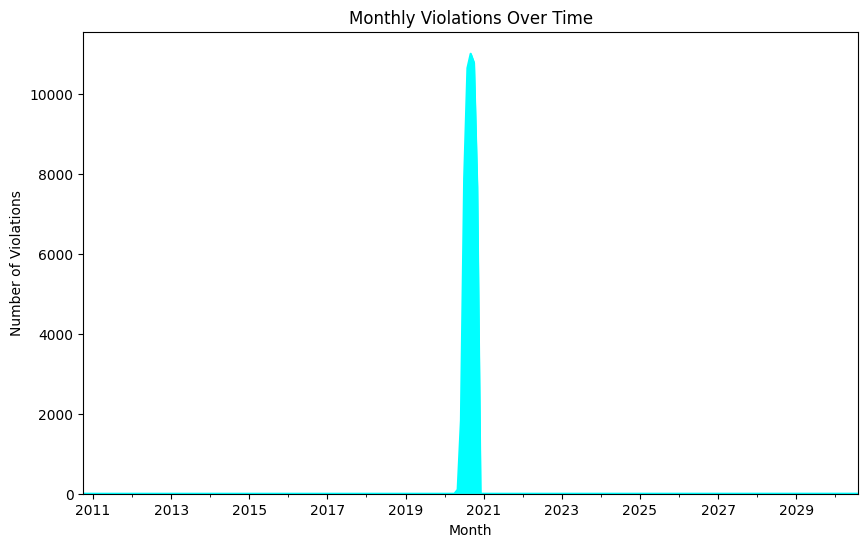


Observation:

The area plot indicates there was a notable increase in violation frequencies in 2020 compared to other years.


In [36]:
# Define the dimensions of your plot
plt.figure(figsize=(10, 6))

# Create an area plot of the monthly violation counts
monthly_violations.plot(kind="area", color = "cyan")

# Define the title of the area plot
plt.title("Monthly Violations Over Time")

# Define the label of the abscissa
plt.xlabel("Month")

# Define the label of the ordinate
plt.ylabel("Number of Violations")

# Remove the grid for better readability
plt.grid(False)

# Display the area plot
print()
print("**********  GRAPHICAL REPRESENTATION OF THE CHANGE IN FREQUENCY OF PARKING VIOLATIONS FOR EACH MONTH OVER TIME  **********")
print()
plt.show()
print()
print("Observation:")
print()
print("The area plot indicates there was a notable increase in violation frequencies in 2020 compared to other years.")

#### Step 4: Determine the frequency of violations for each year over time

In [37]:
# Determine the number of violations for each month
yearly_violations = npv_igpf_dformatted.resample("YE", on = "Issue Date").size()

# Print the number of violations for each month 
print()
print("The number of violations for each year is:")
print()
print(yearly_violations)


The number of violations for each year is:

Issue Date
2010-12-31        1
2011-12-31        0
2012-12-31        0
2013-12-31        0
2014-12-31        0
2015-12-31        0
2016-12-31        0
2017-12-31        0
2018-12-31        0
2019-12-31        1
2020-12-31    49915
2021-12-31        1
2022-12-31        1
2023-12-31        0
2024-12-31        0
2025-12-31        0
2026-12-31        1
2027-12-31        0
2028-12-31        0
2029-12-31        0
2030-12-31        1
Freq: YE-DEC, dtype: int64


#### Step 5: Plot a line chart to represent the change in frequency of violations for each year over time


**********  GRAPHICAL REPRESENTATION OF THE CHANGE IN FREQUENCY OF PARKING VIOLATIONS FOR EACH YEAR OVER TIME  **********



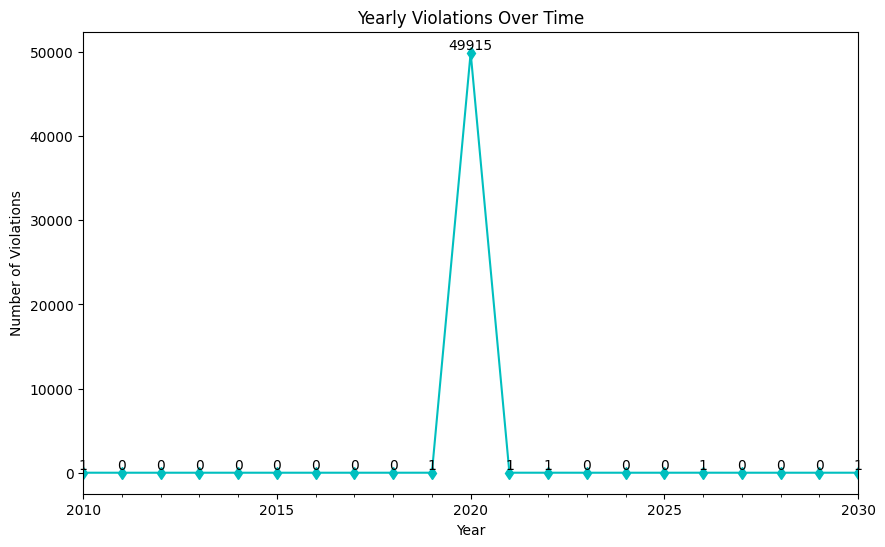


Observation:

The line plot confirms there was a notable increase in violation frequencies in 2020 compared to other years.


In [38]:
# Define the dimensions of your plot
plt.figure(figsize=(10, 6))

# Create a line plot of the yearly violation counts
yearly_violations.plot(kind="line", marker="d", color="c")

# Annotate each data point with its value
for i, count in enumerate(yearly_violations):
    plt.text(yearly_violations.index[i], count, str(count), ha="center", va="bottom")

# Define the title of the line plot
plt.title("Yearly Violations Over Time")

# Define the label of the abscissa
plt.xlabel("Year")

# Define the label of the ordinate
plt.ylabel("Number of Violations")

# Remove the grid for better readability
plt.grid(False)

# Display the line plot
print()
print("**********  GRAPHICAL REPRESENTATION OF THE CHANGE IN FREQUENCY OF PARKING VIOLATIONS FOR EACH YEAR OVER TIME  **********")
print()
plt.show()
print()
print("Observation:")
print()
print("The line plot confirms there was a notable increase in violation frequencies in 2020 compared to other years.")

#### Step 6: Determine the frequency of violations for each month in 2020

In [39]:
# Filter the DataFrame for the year 2020
npv_igpf_dformatted_2020 = npv_igpf_dformatted[npv_igpf_dformatted["Issue Date"].dt.year == 2020]

# Resample the DataFrame monthly and determine the number of violations for each month in 2020
monthly_violations_2020 = npv_igpf_dformatted_2020.resample("ME", on="Issue Date").size()

# Print the number of violations for each month in 2020 
print()
print("The number of violations for each month in 2020 is:")
print()
print(monthly_violations_2020)


The number of violations for each month in 2020 is:

Issue Date
2020-02-29        2
2020-03-31        0
2020-04-30        0
2020-05-31      101
2020-06-30     1832
2020-07-31     7888
2020-08-31    10643
2020-09-30    11002
2020-10-31    10777
2020-11-30     7670
Freq: ME, dtype: int64


#### Step 7: Plot a line chart to represent the change in frequency of violations for each month in 2020


**********  GRAPHICAL REPRESENTATION OF THE CHANGE IN FREQUENCY OF PARKING VIOLATIONS IN 2020  **********



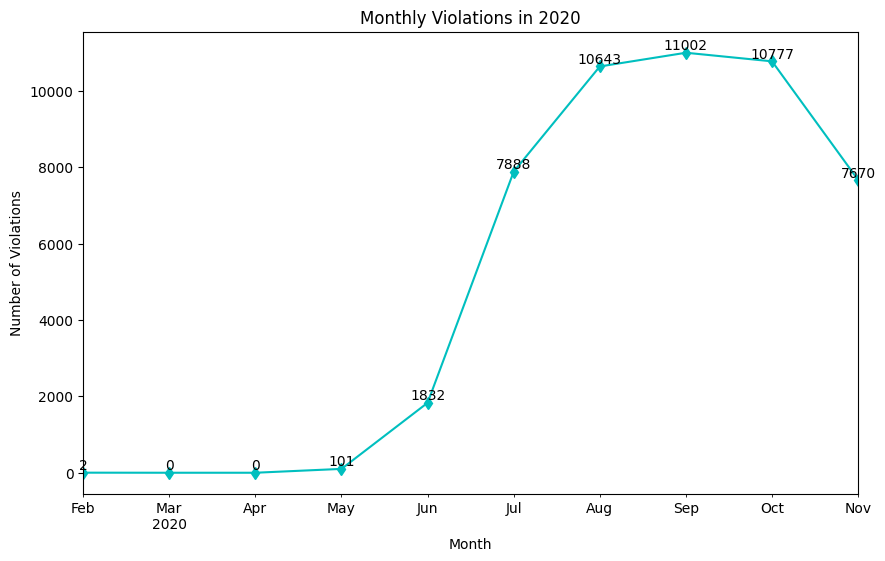


Observation:

The line plot indicates there were relatively more violation frequencies in autumn of 2020 compared to the other seasons.


In [40]:
# Define the dimensions of your plot
plt.figure(figsize=(10, 6))

# Create a line plot of the monthly violation counts in 2020
monthly_violations_2020.plot(kind="line", marker="d", color="c")

# Annotate each data point with its value
for i, count in enumerate(monthly_violations_2020):
    plt.text(monthly_violations_2020.index[i], count, str(count), ha='center', va='bottom')

# Define the title of the line plot
plt.title("Monthly Violations in 2020")

# Define the label of the abscissa
plt.xlabel("Month")

# Define the label of the ordinate
plt.ylabel("Number of Violations")

# Remove the grid for better readability
plt.grid(False)

# Display the line plot
print()
print("**********  GRAPHICAL REPRESENTATION OF THE CHANGE IN FREQUENCY OF PARKING VIOLATIONS IN 2020  **********")
print()
plt.show()
print()
print("Observation:")
print()
print("The line plot indicates there were relatively more violation frequencies in autumn of 2020 compared to the other seasons.")

### Miscellaneous Codes

#### Number of missing values in "Violation Description" column before filling 

In [59]:
npv_igp12 = npv_igp[["Violation Code", "Violation Description"]]
len(npv_igp12[npv_igp["Violation Description"].isna()])

27198

#### Number of missing values in "Violation Description" column for specified range of violation codes before filling 

In [60]:
npv_igp12 = npv_igp[["Violation Code", "Violation Description"]]
filtered_df = npv_igp12[(npv_igp12["Violation Description"].isnull()) & (npv_igp12["Violation Code"].between(0, 100))]
len(filtered_df)

27198

#### Number of values in "Violation Description" column assigned new codes based on mapping directory

In [54]:
npv_igp12 = npv_igpmapped[["Violation Code", "Violation Description"]]
len(npv_igp12[npv_igp12["Violation Code"].between(100, 110)])

734

#### Number of missing values in "Violation Description" column after filling based on mapping directory

In [56]:
npv_igp12 = npv_igpmapped[["Violation Code", "Violation Description"]]
len(npv_igp12[npv_igpmapped["Violation Description"].isna()])

79

#### Number of missing values in "Violation Description" column after final pruning

In [57]:
npv_igp12 = npv_igpf[["Violation Code", "Violation Description"]]
len(npv_igp12[npv_igpf["Violation Description"].isna()])

0

#### Number of values in the common violations series and the violation map directory

In [53]:
# Get the values of the Pandas Series
common_violations_values = set(common_violations.index)

# Get the values of the dictionary
violation_map_values = set(violation_map.values())

# Find the values that appear in one but not the other
values_only_in_common_violations = common_violations_values - violation_map_values
values_only_in_violation_map = violation_map_values - common_violations_values

# Print the number of values in the common violations series and the violation map directory
print()
print(f"Common violations series has {len(common_violations)} values")
print(f"Violation map directory has {len(violation_map)} values")
print()

# Print the values that appear in one but not the other
print("Values only in common_violations Series:", values_only_in_common_violations)
print("Values only in violation_map dictionary:", values_only_in_violation_map)


Common violations series has 73 values
Violation map directory has 73 values

Values only in common_violations Series: set()
Values only in violation_map dictionary: set()
